# 우지윤74_0903_복습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_bk.csv')

In [3]:
# 날짜와, 시간 날 수 있다.
train['datetime'][100].split()

train['datetime'][100].split()[1]

'09:00:00'

In [4]:
# 연도 월 일을 나눠보자!
train['datetime'][100].split()[0]
train['datetime'][100].split('-')

['2011', '01', '05 09:00:00']

In [5]:
train['date'] = train['datetime'].apply(lambda x:x.split()[0]) 
train['year'] = train['datetime'].apply(lambda x:x.split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[2])


train['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

In [6]:
#요일도 뽑을 수 있다.
from datetime import datetime
import calendar

In [7]:
print(datetime.strptime(train['date'][10], '%Y-%m-%d'))

#월화수목금토일 정수로 변환
print(datetime.strptime(train['date'][10], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][10], '%Y-%m-%d').weekday()])

2011-01-01 00:00:00
5
Saturday


In [8]:
train['weekday'] = train['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [9]:
import seaborn as sns

C:\Users\jwoo\AppData\Local\Temp/ipykernel_23476/1298751210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


<Axes: xlabel='count', ylabel='Density'>

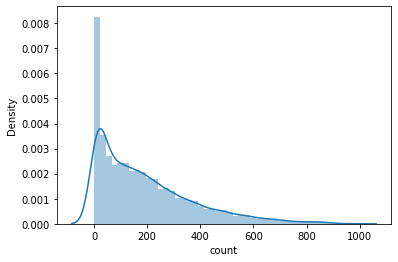

In [10]:
sns.distplot(train['count'])

C:\Users\jwoo\AppData\Local\Temp/ipykernel_23476/1911422551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']))


<Axes: xlabel='count', ylabel='Density'>

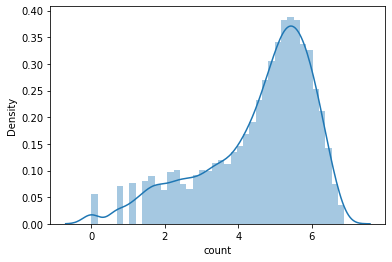

In [11]:
sns.distplot(np.log(train['count']))

In [12]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


### 시각화 인사이트

<Axes: xlabel='holiday', ylabel='count'>

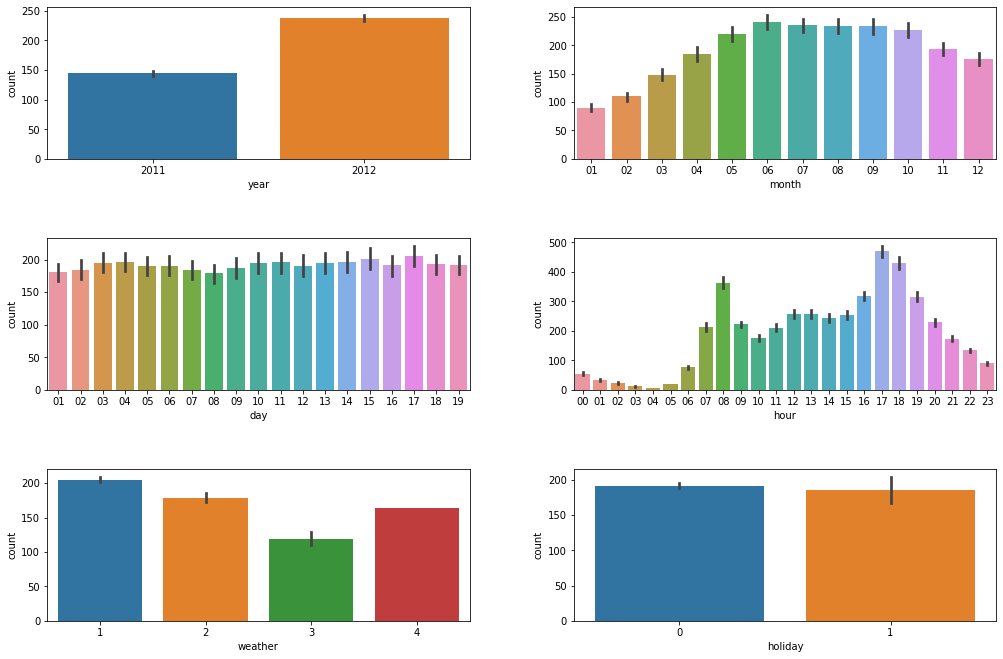

In [13]:
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

# count Y값과 시계열적인 트렌드를 비교해서 인사이트를 뽑기!
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='weather', y='count', data=train, ax=axes[2,0])
sns.barplot(x='holiday', y='count', data=train, ax=axes[2,1])

### 이상치
### 추가적으로 통계적인 분석가능하다!

<Axes: xlabel='holiday', ylabel='count'>

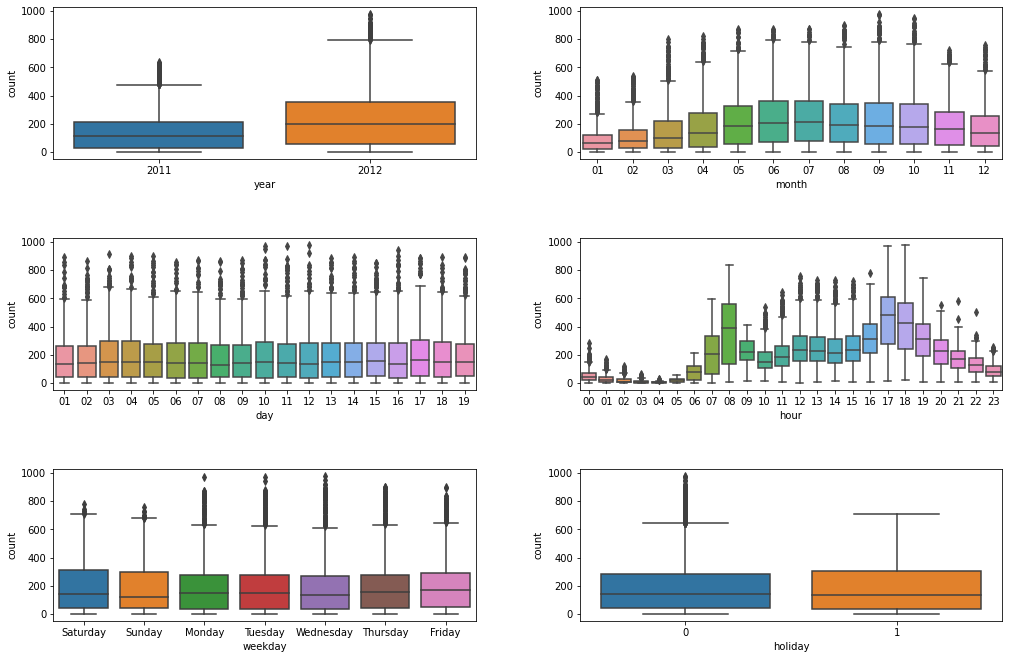

In [14]:
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

# count Y값과 시계열적인 트렌드를 비교해서 인사이트를 뽑기!
sns.boxplot(x='year', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='month', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='day', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.boxplot(x='weekday', y='count', data=train, ax=axes[2,0])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[2,1])

In [15]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [16]:
train['weather']= train['weather'].map({1:'clear',
                                       2:'Mist',
                                       3:'Light Snow,Light Rain,Thunderstorm',
                                       4:'Heavy rain,snow,fog'})

In [17]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


### 트렌드를 확인해보기!
- working day, holiday 랑 같이 변수 3개 섞어서 sns 돌려보자!

<Axes: xlabel='hour', ylabel='count'>

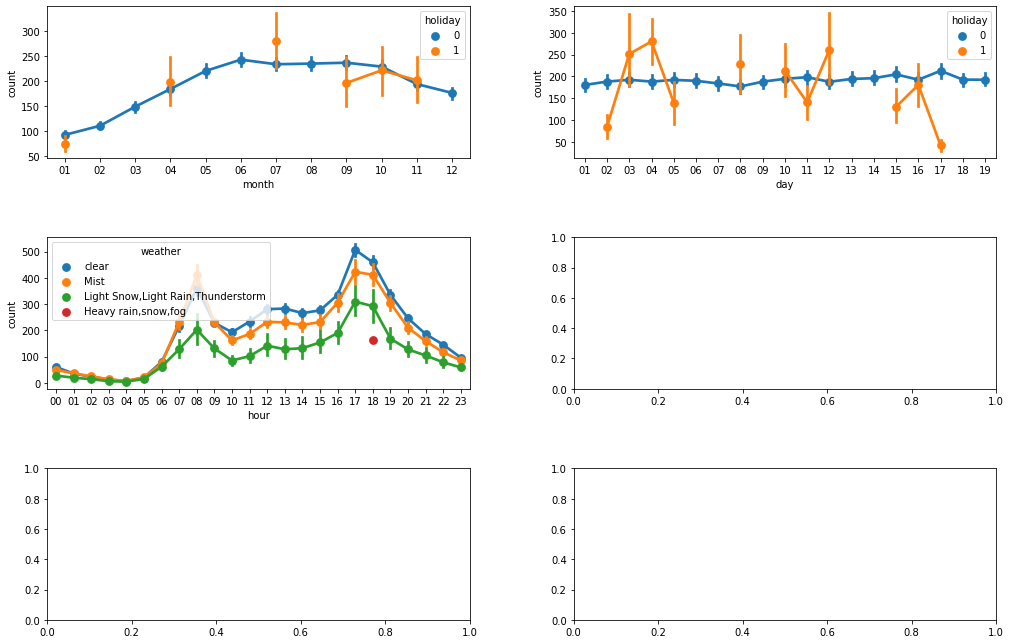

In [18]:
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

# count Y값과 시계열적인 트렌드를 비교해서 인사이트를 뽑기!
sns.pointplot(x='month', y='count',hue='holiday', data=train, ax=axes[0,0])
sns.pointplot(x='day', y='count', hue='holiday', data=train, ax=axes[0,1])
sns.pointplot(x='hour', y='count', hue='weather',data=train, ax=axes[1,0])
#sns.boxplot(x='hour', y='count', data=train, ax=axes[1,1])
#sns.boxplot(x='weekday', y='count', data=train, ax=axes[2,0])
#sns.boxplot(x='weather', y='count', data=train, ax=axes[2,1])

### 산점도와 상관계수

<Axes: xlabel='windspeed', ylabel='count'>

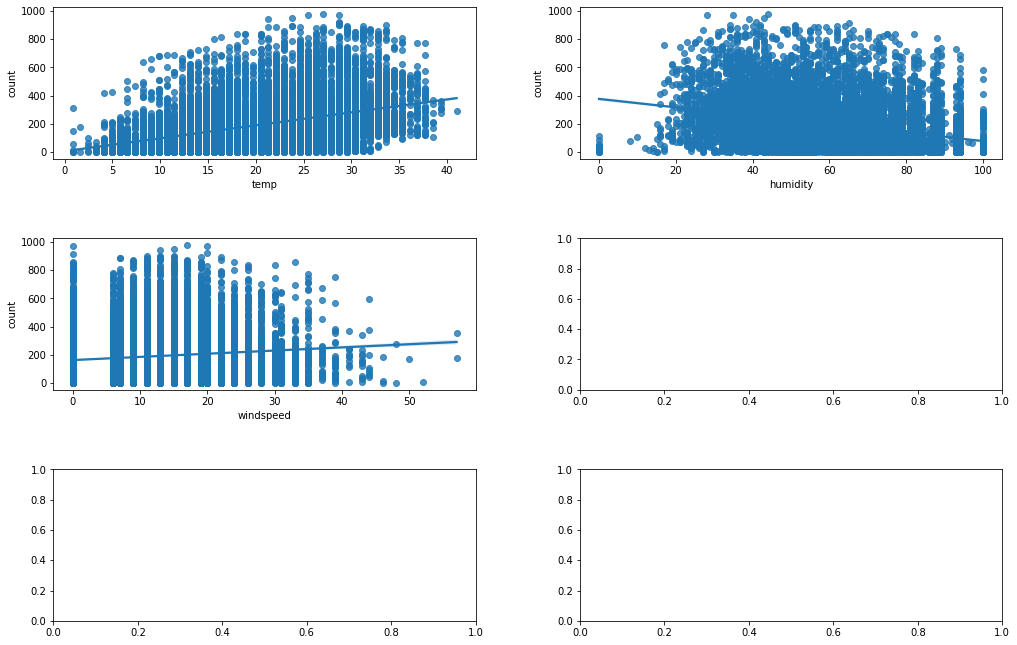

In [19]:
#날씨와 관련된 내용은 관련이 있다.
# 범주형 변수와 봤다면, 지금은 연속형 변수들과 체크해보자!
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.regplot(x='temp',y='count',data = train, ax=axes[0,0])
sns.regplot(x='humidity',y='count',data = train, ax=axes[0,1])
sns.regplot(x='windspeed',y='count',data = train, ax=axes[1,0])

[Text(0.5, 1.0, 'Heatmap')]

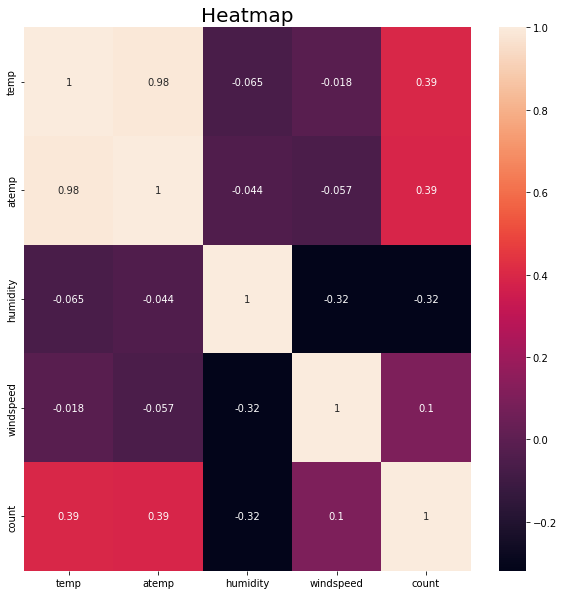

In [20]:
#연속형 변수들과 확인해 보기!
tr_corr=train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(tr_corr, annot=True)
ax.set(title='Heatmap')

In [21]:
tr_corr

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


### 모델링으로 실제 성능평가!

In [22]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day', 'hour', 'minute', 'second', 'weekday'],
      dtype='object')

In [25]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [26]:
train_sp1 =train[['season','temp','weather','humidity','windspeed','casual','hour','month','count']]

In [27]:
trian_sp=train[['season','temp','humidity','windspeed','casual','hour','month','count']]
trian_sp=train[['season','temp','humidity','windspeed','casual','hour','month','count']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(trian_sp[['season','temp','humidity','windspeed','casual','hour','month']], trian_sp['count'], test_size=0.3, random_state=111)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_sp1[['season','temp','humidity','windspeed','weather','casual','hour','month']], train_sp1['count'], test_size=0.3, random_state=111)

In [30]:
X_train

,season,temp,humidity,windspeed,weather,casual,hour,month
7166,2,28.70,45,19.9995,clear,24,23,04
2008,2,25.42,33,0.0000,Mist,42,14,05
5425,1,12.30,81,0.0000,clear,11,03,01
10359,4,10.66,60,12.9980,clear,13,01,11
4714,4,20.50,51,11.0014,clear,24,12,11
...,...,...,...,...,...,...,...,...
8873,3,26.24,69,8.9981,clear,19,02,08
7443,2,25.42,57,15.0013,Mist,58,12,05
4182,4,17.22,62,12.9980,clear,15,07,10
4820,4,19.68,41,26.0027,clear,25,22,11


In [31]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [78]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [110]:
pred = linear_reg_model.predict(X_train)
pred_test = linear_reg_model.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
mean_squared_error(y_train, pred)

15286.190233331172

0.81 나왔는데 왜? 높은 수치가 나왔나?

In [107]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [108]:
pred = linear_reg_model.predict(X_train)

In [111]:
print(mean_squared_error(y_train, pred))
print(mean_squared_error(y_test, pred_test))

15279.986118646344
14749.641972597194
